# Messages

In AutoGen AgentChat, _messages_ facilitate communication and information exchange with other agents, orchestrators, and applications. AgentChat supports various message types, each designed for specific purposes.

## Types of Messages

At a high level, messages in AgentChat can be categorized into two types: agent-agent messages and an agent's internal events and messages.

### Agent-Agent Messages
AgentChat supports many message types for agent-to-agent communication. They belong to the union type {py:class}`~autogen_agentchat.messages.ChatMessage`. This message type allows both text and multimodal communication and subsumes other message types, such as {py:class}`~autogen_agentchat.messages.TextMessage` or {py:class}`~autogen_agentchat.messages.MultiModalMessage`.

For example, the following code snippet demonstrates how to create a text message, which accepts a string content and a string source:

In [1]:
%%capture
# capture magic suppresses install output
!poetry add autogen_agentchat

In [2]:
from autogen_agentchat.messages import TextMessage

text_message = TextMessage(content="Hello, world!", source="User")

Similarly, the following code snippet demonstrates how to create a multimodal message, which accepts
a list of strings or {py:class}`~autogen_core.Image` objects:


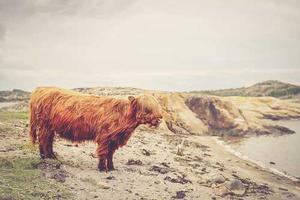

In [3]:
from io import BytesIO

import requests
from autogen_agentchat.messages import MultiModalMessage
from autogen_core import Image as AGImage
from PIL import Image

pil_image = Image.open(BytesIO(requests.get("https://picsum.photos/300/200").content))
img = AGImage(pil_image)
multi_modal_message = MultiModalMessage(content=["Can you describe the content of this image?", img], source="User")
img

The {py:class}`~autogen_agentchat.messages.TextMessage` and  {py:class}`~autogen_agentchat.messages.MultiModalMessage` we have created can be passed to agents directly via the {py:class}`~autogen_agentchat.base.ChatAgent.on_messages` method, or as tasks given to a team {py:meth}`~autogen_agentchat.teams.BaseGroupChat.run` method. Messages are also used in the responses of an agent. We will explain these in more detail in [Agents](./agents.ipynb) and [Teams](./teams.ipynb).

### Internal Events

AgentChat also supports the concept of `events` - messages that are internal to an agent. These messages are used to communicate events and information on actions _within_ the agent itself, and belong to the union type {py:class}`~autogen_agentchat.messages.AgentEvent`.

Examples of these include {py:class}`~autogen_agentchat.messages.ToolCallRequestEvent`, which indicates that a request was made to call a tool, and {py:class}`~autogen_agentchat.messages.ToolCallExecutionEvent`, which contains the results of tool calls.

Typically, events are created by the agent itself and are contained in the {py:attr}`~autogen_agentchat.base.Response.inner_messages` field of the {py:class}`~autogen_agentchat.base.Response` returned from {py:class}`~autogen_agentchat.base.ChatAgent.on_messages`. If you are building a custom agent and have events that you want to communicate to other entities (e.g., a UI), you can include these in the {py:attr}`~autogen_agentchat.base.Response.inner_messages` field of the {py:class}`~autogen_agentchat.base.Response`. We will show examples of this in [Custom Agents](./custom-agents.ipynb).


You can read about the full set of messages supported in AgentChat in the {py:mod}`~autogen_agentchat.messages` module. 
<!-- Note that this is not an exhaustive list, and you can create custom messages as needed by subclassing the {py:class}`~autogen_agentchat.messages.BaseMessage` class. -->